# Transformée quadratique 1D

In [1]:
import numpy as np 
import math as math 
import matplotlib.pyplot as plt

#### Question 1

In [2]:
### Transformée quadratique directe

def quad_1d_directfct(n,u):
    ##v = np.zeros(n)
    v = np.copy(u)
    v=v.astype(float)
    w = np.copy(u)
    w=w.astype(float)
    vp = np.zeros(n,float)
    ##vp = np.copy(u)
    m = n    
    while (m>1):         
      
        for i in range (0,int(m/2)):
           ##Les valeurs moyennes
            w[i]=(v[2*i]+v[2*i+1])/2
            ##Valeurs des erreurs aux bords
            w[i+int(m/2)]= (v[2*i]-v[2*i+1])/2
            
        for i in range (1,int(m/2)-1):
            ##les valeurs prédites
            vp[2*i]=w[i]-(1/8)*(w[i-1]-w[i+1])          
            ##l'erreur
            w[i+int(m/2)]= v[2*i]-vp[2*i]   
            
        for i in range (m):
            v[i]=w[i]
       
        m=int(m/2)
        ##Pour garantir le fait d'avoir des valeurs sous format float
        v=[float(i) for i in v]
        
    return v 

In [3]:
##test avant d'avancer sur le tp
quad_1d_directfct(8,[1,2,3,4,5,6,7,8])

[4.5, -2.0, -1.0, -1.0, -0.5, -1.0, -1.0, -0.5]

In [18]:
##Transformée quadratique inverse

def quad_inversefct(n,u):
    v = np.zeros(n,float)
    v = np.copy(u)
    w = np.zeros(n,float)
    ##w = np.copy(u)
    vp = np.zeros(n,float)
    ##vp = np.copy(u)
    
    m = 1
    
    while n > m:
        
        ##les valeurs aux bords
        ## k=0
        w[0]=v[0]+v[m]
        w[1]=2*v[0]-w[0]
        ## k=m-1
        w[2*m-2]=v[m-1]+v[2*m-1]
        w[2*m-1]=2*v[m-1]-w[2*m-2]
        
        for i in range (1,m-1):
            ##les valeurs prédites
            vp[2*i]=v[i]-(1/8)*(v[i-1]-v[i+1])
            ##on ajoute l'erreur
            w[2*i]=vp[2*i]+v[i+m]
            w[2*i+1]= 2*v[i]-w[2*i]
            ##w[2*i+1]= vp[2*i]-w[i+m]
            
        for i in range (2*m):
            v[i]=w[i]
            
        m *= 2
        ##Pour garantir le fait d'avoir des valeurs sous format float
        v=[float(i) for i in v]
        
    return v

In [5]:
##test de la transformée qudratique inverse
quad_inversefct(8,[4.5,-2, -1, -1, -0.5, -1, -1, -0.5])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

#### Question 2

In [6]:
##Définissons les exemples

##ex1:  x[i]=i tel que i appartient à [1,n]
def ex1(n): 
    x= np.zeros((n)) 
    for i in range (n): 
        x[i] = i+1
    return x


##Ligne d'une image
#Soit la ligne img dont la taille est 64=2**6
img = [78,15,47,96,12,45,125,147,12,58,78,45,12,12,47,15,48,78,210,45,87,95,21,36,78,147,63,78,111,46,85,21,74,36,52,52,52,14,174,175,177,68,71,68,74,111,46,85,21,74,36,52,52,52,14,174,175,177,68,71,68,74,7,6] 


##ex3
def ex3(n): 
    v = np.zeros((n)) 
    pi = math.pi 
    for i in range(0,n): 
        if i <= n/2:
            v[i]=math.sin(2*pi*i) 
        else: 
            v[i]=0.5+math.sin(2*pi*i) 
    return v



In [7]:
size=64
tab1 = ex1(size) 
tab3 = ex3(size)

quad1 = quad_1d_directfct(size,tab1)
quad2 = quad_1d_directfct(size,img)
quad3 = quad_1d_directfct(size,tab3)

In [12]:
##Vérification de x=inverse(directe(x))
##ex1
result = all(map(lambda x, y: x == y, tab1, quad_inversefct(size,quad1)))
if result:
    print("C'est vérifié pour le premier exemple")
else:
    print("Ce n'est pas vérifié pour le premier exemple")


C'est vérifié pour le premier exemple


In [13]:
##Vérification de x=inverse(directe(x))
##ex2
result = all(map(lambda x, y: x == y, img, quad_inversefct(size,quad2)))
if result:
    print("C'est vérifié pour le deuxième exemple")
else:
    print("Ce n'est pas vérifié pour le deuxième exemple")

C'est vérifié pour le deuxième exemple


In [17]:
##Vérification de x=inverse(directe(x))
##ex3
result = all(map(lambda x, y: x == y, tab3, quad_inversefct(size,quad3)))
if result:
    print("C'est vérifié pour le troisième exemple")
else:
    print("Ce n'est pas vérifié pour le troisième exemple")

Ce n'est pas vérifié pour le troisième exemple


# Transformée de haar 1D

In [1]:
##On reprend le tp 1 pour pouvoir comparer les deux transformées


##Transformée directe de Haar
def haarl_1d_direction(n,u): 
    v = np.zeros(n,float)
    v = np.copy(u)
    v = v.astype(float)
    w = np.zeros(n)
    w = w.astype(float)
    m = n
    while m>1: 
        for i in range (int(m/2)):
            w[i]=(v[2*i]+v[2*i+1])/2
            w[i+int(m/2)]= (v[2*i]-v[2*i+1])/2
        for i in range (m):
            v[i]=w[i]
        m=int(m/2)
        v=[float(i) for i in v]
    return v 

##Transformée inverse de Haar
def haarl_1d_inverse(n,v): 
    u = np.zeros(n,float)
    u = np.copy(v)
    w = np.zeros(n)
    w=w.astype(float)
    
    m = 2
    while n >= m:
        for i in range (int(m/2)):
            w[2*i]=u[i]+u[i+int(m/2)]
            w[2*i+1]= u[i]-u[i+int(m/2)]
        for i in range (m):
            u[i]=w[i]
        m *= 2
        u=[float(i) for i in u]
    return u

In [43]:
haar1 = haarl_1d_direction(size,tab1)
haar2 = haarl_1d_direction(size,img)
haar3 = haarl_1d_direction(size,tab3)

#### Question 3

In [19]:
##Définissons une fonction de seuillage
def sueillage(x,T):
    y= np.copy(x)
    y[np.absolute(y)<=T]=0
    return y

In [46]:
## Pour le seuil T=12 -- ex1
print('Transformée de Haar')
print( sueillage(haar1,12))

print('Transformée quadratique')
print( sueillage(quad1,12))

Transformée de Haar
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]
Transformée quadratique
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]


In [45]:
## Pour le seuil T=12 -- ex2
print('Transformée de Haar')
print( sueillage(haar2,12))

print('Transformée quadratique')
print( sueillage(quad2,12))

Transformée de Haar
[ 70.71875   0.      -12.625     0.       17.75      0.        0.
   0.        0.       13.25     17.75     12.75    -25.        0.
 -13.75     42.      -12.5     -54.      -13.        0.      -32.
  31.5      21.       12.5       0.      -70.5      26.5      13.5
   0.      -21.       53.5      32.5      31.      -24.      -16.
   0.      -23.       16.        0.       16.      -15.       82.
   0.        0.      -34.        0.       32.       32.       19.
   0.       19.        0.       54.        0.      -18.      -19.
 -26.        0.        0.      -80.        0.        0.        0.
   0.     ]
Transformée quadratique
[ 70.984375   0.       -12.65625    0.        17.875      0.
   0.         0.         0.        12.515625  12.28125   12.734375
 -26.234375   0.       -12.78125   42.       -12.5      -52.40625
   0.       -15.375    -37.03125   31.71875   20.25      17.5
   0.       -76.0625    29.59375   19.78125    0.       -30.625
  57.53125   32.25      31.5 

In [47]:
## Pour le seuil T=12 -- ex3
print('Transformée de Haar')
print( sueillage(haar3,12))

print('Transformée quadratique')
print( sueillage(quad3,12))

Transformée de Haar
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transformée quadratique
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
## Pour le seuil T=128 -- ex1
print('Transformée de Haar')
print( sueillage(haar1,128))

print('Transformée quadratique')
print( sueillage(quad1,128))

Transformée de Haar
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transformée quadratique
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
## Pour le seuil T=128 -- ex2
print('Transformée de Haar')
print( sueillage(haar2,128))

print('Transformée quadratique')
print( sueillage(quad2,128))

Transformée de Haar
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transformée quadratique
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
## Pour le seuil T=128 -- ex3
print('Transformée de Haar')
print( sueillage(haar3,128))

print('Transformée quadratique')
print( sueillage(quad3,128))

Transformée de Haar
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transformée quadratique
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
#comme on prend pas de grandes valeurs dans nos exemples, on obtient des résultats pareils 
#pour la transfomée de Haar et quadratique
#sauf au niveau du seuillage 12 appliqué à la ligne de l'image dont on avait des valeurs supérieures à 12 

#### Question4

In [52]:
#Calculons l'erreur entre deux vecteurs
def normeL2(x,y): 
    if len(x)!=len(y): 
        print("Les deux vecteurs on des tailles différente") 
    else: 
        n=len(x)
        v=0 
        for i in range(n): 
            v=v + np.square(np.absolute(x[i]-y[i])) 
            v= np.sqrt(v) 
    return v

In [53]:
##Transformée quadratique
quadS11 = quad_inversefct(size,sueillage(quad1,12))
quadS12 = quad_inversefct(size,sueillage(quad1,128))

quadS21 = quad_inversefct(size,sueillage(quad2,12))
quadS22 = quad_inversefct(size,sueillage(quad2,128))

quadS31 = quad_inversefct(size,sueillage(quad3,12))
quadS32 = quad_inversefct(size,sueillage(quad3,128))

##Transformée de Haar
haarS11 = haarl_1d_inverse(size,sueillage(haar1,12))
haarS12 = haarl_1d_inverse(size,sueillage(haar1,128))

haarS21 = haarl_1d_inverse(size,sueillage(haar2,12))
haarS22 = haarl_1d_inverse(size,sueillage(haar2,128))

haarS31 = haarl_1d_inverse(size,sueillage(haar3,12))
haarS32 = haarl_1d_inverse(size,sueillage(haar3,128))

In [54]:
##ex1 -- Seuil = 12
print('Transformée de Haar')
print( normeL2(tab1,haarS11))

print('Transformée quadratique')
print( normeL2(tab1,quadS11))

Transformée de Haar
15.975733093747309
Transformée quadratique
15.975740780802537


In [55]:
##ex1 -- Seuil = 128
print('Transformée de Haar')
print( normeL2(tab1,haarS12))

print('Transformée quadratique')
print( normeL2(tab1,quadS12))

Transformée de Haar
64.49413962970115
Transformée quadratique
64.49413962970115


In [56]:
##ex2 -- Seuil = 12
print('Transformée de Haar')
print( normeL2(img,haarS21))

print('Transformée quadratique')
print( normeL2(img,quadS21))

Transformée de Haar
10.346225133367161
Transformée quadratique
9.818640175602113


In [57]:
##ex2 -- Seuil = 128
print('Transformée de Haar')
print( normeL2(img,haarS22))

print('Transformée quadratique')
print( normeL2(img,quadS22))

Transformée de Haar
6.863769056658209
Transformée quadratique
6.863769056658209


In [58]:
##ex3 -- Seuil = 12
print('Transformée de Haar')
print( normeL2(tab3,haarS31))

print('Transformée quadratique')
print( normeL2(tab3,quadS31))

Transformée de Haar
1.207106781186242
Transformée quadratique
1.207106781186242


In [59]:
##ex3 -- Seuil = 128
print('Transformée de Haar')
print( normeL2(tab3,haarS32))

print('Transformée quadratique')
print( normeL2(tab3,quadS32))

Transformée de Haar
1.207106781186242
Transformée quadratique
1.207106781186242


In [60]:
# En comparant les résultats, on remarque qu'on obtient les mêmes valeurs sauf qu'on le seuil est définit à 12.
# Dans ce cas-lâ, l'erreur est plus petite en utilisant la transformée quadratique qu'en utilisant la transformée de Haar.

#### Question 5

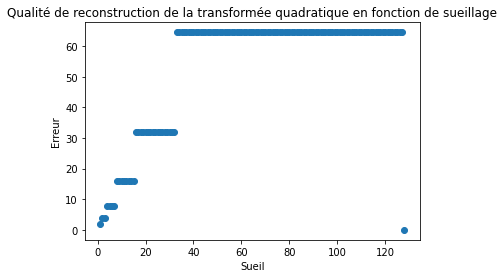

In [61]:
##ex1
t = ex1(128) ##2**7
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab1,quad_inversefct(size,sueillage(quad1,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de la transformée quadratique en fonction de sueillage')
plt.xlabel('Seuil')
plt.ylabel('Erreur')
plt.show()

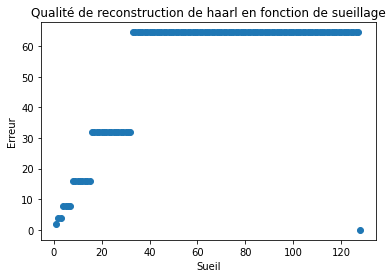

In [62]:
##ex1
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab1,haarl_1d_inverse(size,sueillage(haar1,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

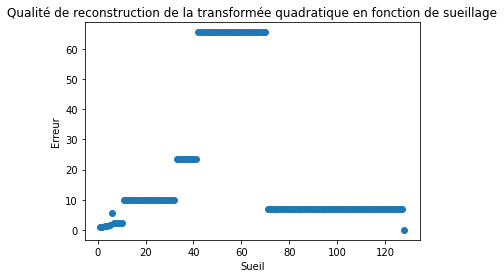

In [63]:
##ex2
t = ex1(128) ##2**7
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(img,quad_inversefct(size,sueillage(quad2,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de la transformée quadratique en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

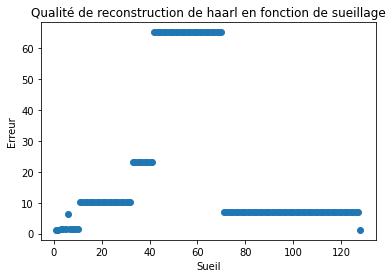

In [65]:
##ex2
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(img,haarl_1d_inverse(size,sueillage(haar2,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

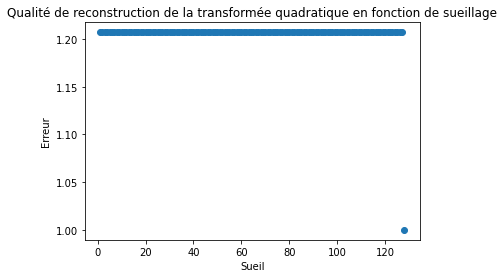

In [66]:
##ex3
t = ex1(128) ##2**7
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab3,quad_inversefct(size,sueillage(quad3,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de la transformée quadratique en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

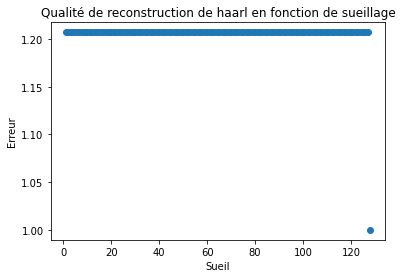

In [67]:
##ex3
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab3,haarl_1d_inverse(size,sueillage(haar3,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

In [ ]:
##En comparant les courbes, on remarque qu'elles sont pareilles.
##Sauf pour le cas du vecteur img, on remarque une petite différence autour du seuil 12. Ceci est dû aux valeurs choisies dans img.